# Graph Dominating Sets and Cliques
## Author: Snigdhayan Mahanta

I analyzed below the sizes of `dominating sets` and `maximal cliques` in a graph as a function of the connectivity or the number of edges in the graph. For this purpose I used the python package `NetworkX`.


In [1]:
import random
import networkx as nx
import matplotlib.pyplot as plt
import statistics
import scipy
import pandas as pd

In [2]:
# Define graph creation functions

# Create an undirected graph based on the numbers of vertices and edges
def create_graph(n_vertices, n_edges):
    n_vertices = n_vertices
    n_edges = n_edges
    vertices = [i+1 for i in range(n_vertices)]
    self_edges = [(i+1,i+1) for i in range(n_vertices)]
    edges = [random.sample(vertices, k=2) for _ in range(n_edges)]
    edges = list(map(lambda x: tuple(x), edges))
    edges.extend(self_edges)
    
    graph = nx.Graph()
    graph.add_edges_from(edges)
    return graph


# Create a directed graph based on the numbers of vertices and edges
def create_directed_graph(n_vertices, n_edges):
    n_vertices = n_vertices
    n_edges = n_edges
    vertices = [i+1 for i in range(n_vertices)]
    self_edges = [(i+1,i+1) for i in range(n_vertices)]
    edges = [random.sample(vertices, k=2) for _ in range(n_edges)]
    edges = list(map(lambda x: tuple(x), edges))
    edges.extend(self_edges)
    
    graph = nx.DiGraph()
    graph.add_edges_from(edges)
    return graph

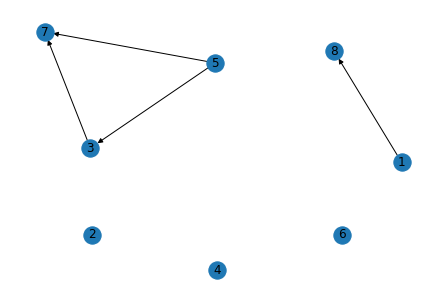

In [3]:
# Create a graph and visualize it
n_vertices = 8 # number of vertices
n_edges = 4 # number of directed edges
vertices = [i+1 for i in range(n_vertices)] # set of vertices
Graph = create_directed_graph(n_vertices, n_edges)
nx.draw_kamada_kawai(Graph, with_labels=True)

# Graph2 = nx.random_tree(20)
# nx.draw_circular(Graph2, with_labels=True)

In [4]:
# Look at the adjacency matrix of the graph
matrix = nx.adjacency_matrix(Graph)
matrix = scipy.sparse.csr_matrix.toarray(matrix)
matrix = pd.DataFrame(matrix, dtype='int32', index=vertices, columns=vertices)
matrix # The adjacency matrix does not match the graph above (possibly correct up to vertex permutation)

,1,2,3,4,5,6,7,8
1,1,1,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0
3,0,0,1,1,1,0,0,0
4,0,0,0,1,0,0,0,0
5,0,0,0,1,1,0,0,0
6,0,0,0,0,0,1,0,0
7,0,0,0,0,0,0,1,0
8,0,0,0,0,0,0,0,1


In [5]:
# Experiment parameters
n_vertices = 100
min_edges = 1000
max_edges = 3000
index = list(range(min_edges, max_edges)) # the range of connectivity
dominating_set_sizes = []
clique_numbers = []

In [6]:
# Conduct the experiment
for i in index:
    G = create_graph(n_vertices, i) # create undirected graph
    x = len(nx.dominating_set(G)) # compute the size of a dominating set
    dominating_set_sizes.append(x)
    y = nx.graph_clique_number(G) # compute the size of a maximal clique
    clique_numbers.append(y)

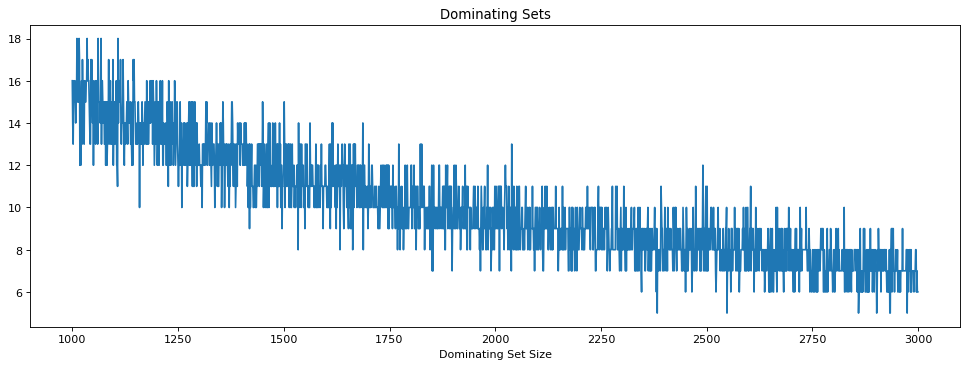

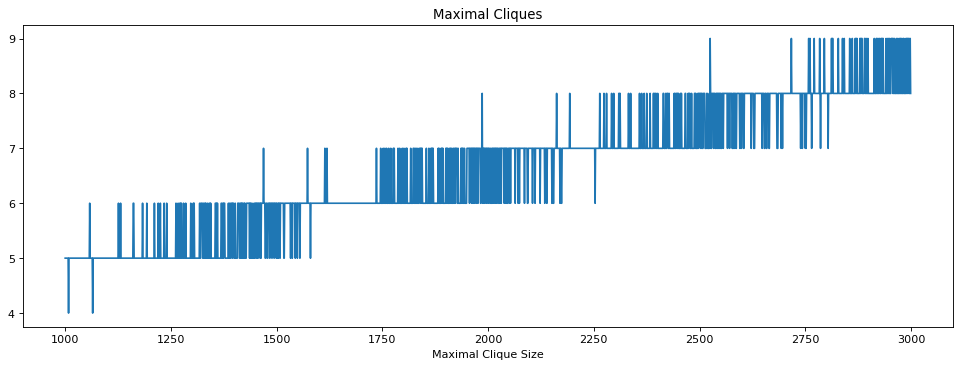

In [7]:
# Plot results

# x-axis values 
x = index
# y-axis values 
y = dominating_set_sizes

# Plot the points 
plt.figure(figsize=(15, 5), dpi=80, facecolor='w', edgecolor='k')
plt.plot(x, y) 
plt.xlabel(F'Dominating Set Size') 
plt.title(F'Dominating Sets')


# x-axis values 
x = index
# y-axis values 
y = clique_numbers

# Plot the points 
plt.figure(figsize=(15, 5), dpi=80, facecolor='w', edgecolor='k')
plt.plot(x, y) 
plt.xlabel(F'Maximal Clique Size')
plt.title(F'Maximal Cliques')

plt.show()

In [8]:
# First scenario
index = list(range(100))
dominating_set_sizes = []
n_edges = 1500

for _ in index:
    G = create_graph(n_vertices, n_edges)
    x = len(nx.dominating_set(G))
    dominating_set_sizes.append(x)

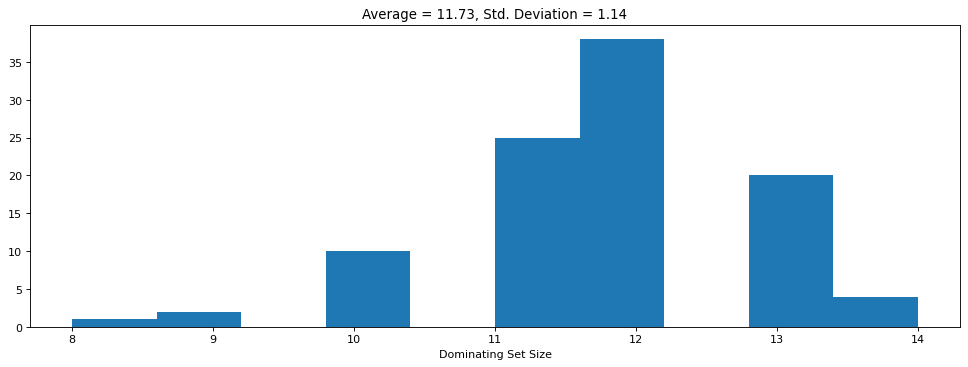

In [9]:
# x-axis values 
x = index
# y-axis values 
y = dominating_set_sizes

# Plot the points 
plt.figure(figsize=(15, 5), dpi=80, facecolor='w', edgecolor='k')
plt.hist(y)
plt.xlabel(F'Dominating Set Size') 

average = round(statistics.mean(dominating_set_sizes), 2)
std_dev = round(statistics.stdev(dominating_set_sizes), 2)

plt.title(F'Average = {average}, Std. Deviation = {std_dev}')

plt.show()

In [10]:
# Second scenario (more edges than the first)
index = list(range(100))
dominating_set_sizes = []
n_edges = 3000

for _ in index:
    G = create_graph(n_vertices, n_edges)
    x = len(nx.dominating_set(G))
    dominating_set_sizes.append(x)

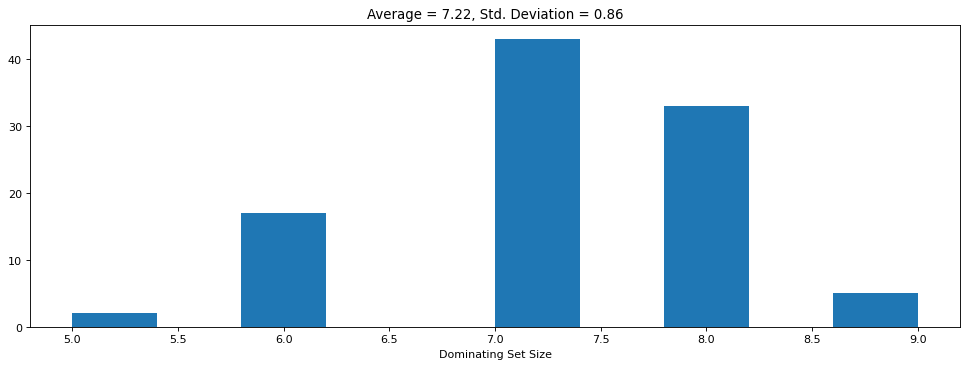

In [11]:
# x-axis values 
x = index
# y-axis values 
y = dominating_set_sizes

# Plot the points 
plt.figure(figsize=(15, 5), dpi=80, facecolor='w', edgecolor='k')
plt.hist(y)
plt.xlabel(F'Dominating Set Size') 

average = round(statistics.mean(dominating_set_sizes), 2)
std_dev = round(statistics.stdev(dominating_set_sizes), 2)

plt.title(F'Average = {average}, Std. Deviation = {std_dev}')

plt.show()